In [33]:
import pandas as pd
##School

# Load the uploaded dataset
data = pd.read_csv("3new_school_with_wages.csv")

# Display the first few rows of the dataset to understand its structure
data.head()


,Sector,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year,Occurrences on List,GDP,Inflation,Total Compensation,Average wages in industry,Average wages in Canada
0,School Boards,102160.00,1035.00,Algoma Central BE,High,1997,1,334502.78125,1.621216,103195.00,43451.2,32427.2
1,School Boards,107648.00,0.00,Blue Water DSB # 7,Middle,1997,1,334502.78125,1.621216,107648.00,43451.2,32427.2
2,School Boards,107794.00,0.00,Blue Water DSB #7,Other,1997,1,334502.78125,1.621216,107794.00,43451.2,32427.2
3,School Boards,117288.00,6913.78,Brant County BE,Other,1997,1,334502.78125,1.621216,124201.78,43451.2,32427.2
4,School Boards,130721.22,621.61,Brant County RCSSB,Other,1997,1,334502.78125,1.621216,131342.83,43451.2,32427.2


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Select features and target variable
features = ['Salary Paid', 'Taxable Benefits', 'GDP', 'Inflation', 
            'Average wages in industry', 'Average wages in Canada']
target = 'Total Compensation'

# Drop rows with missing values
data_cleaned = data[features + [target]].dropna()

# Split into features (X) and target (y)
X = data_cleaned[features]
y = data_cleaned[target]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find the best K using cross-validation
k_values = range(1, 21)
cv_scores = [cross_val_score(KNeighborsRegressor(n_neighbors=k), X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
             for k in k_values]

# Identify the K with the best score (least negative mean squared error)
optimal_k = k_values[np.argmax(cv_scores)]

optimal_k


2

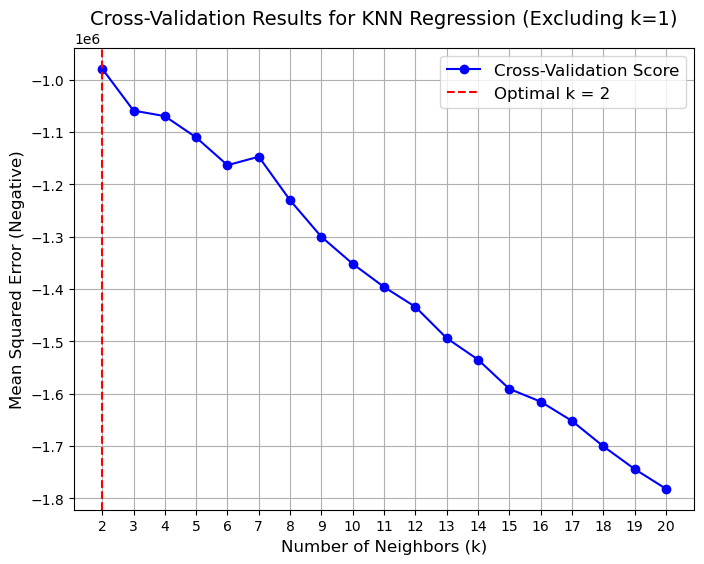

2

In [4]:
# Recompute cross-validation scores for K values
cv_scores = [cross_val_score(KNeighborsRegressor(n_neighbors=k), X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
             for k in k_values]

# Filter out k=1 and find the best k
filtered_k_values = list(k for k in k_values if k != 1)
filtered_cv_scores = [cv_scores[k - 1] for k in filtered_k_values]
best_k_excluding_1 = filtered_k_values[np.argmax(filtered_cv_scores)]

# Plot the graph for k values excluding k=1
plt.figure(figsize=(8, 6))
plt.plot(filtered_k_values, filtered_cv_scores, marker='o', linestyle='-', color='blue', label='Cross-Validation Score')
plt.title('Cross-Validation Results for KNN Regression (Excluding k=1)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Mean Squared Error (Negative)', fontsize=12)
plt.xticks(filtered_k_values)
plt.grid(True)
plt.axvline(x=best_k_excluding_1, color='red', linestyle='--', label=f'Optimal k = {best_k_excluding_1}')
plt.legend(fontsize=12)
plt.show()

best_k_excluding_1



In [6]:
from sklearn.metrics import mean_squared_error, r2_score
# Train the KNN model with k=2
knn_model_k2 = KNeighborsRegressor(n_neighbors=2)
knn_model_k2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_k2 = knn_model_k2.predict(X_test)

# Evaluate the model
mse_k2 = mean_squared_error(y_test, y_pred_k2)
r2_k2 = r2_score(y_test, y_pred_k2)

# Display results
mse_k2, r2_k2


(367235.5780633041, 0.9985949529971072)

In [7]:
from sklearn.metrics import mean_absolute_error, explained_variance_score
import numpy as np

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred_k2)
rmse = np.sqrt(mse_k2)  # RMSE from MSE
mape = np.mean(np.abs((y_test - y_pred_k2) / y_test)) * 100  # MAPE
explained_var = explained_variance_score(y_test, y_pred_k2)

# Display the metrics
mae, rmse, mape, explained_var


(113.64099035805357, 605.9996518673127, 0.08128104596308885, 0.998595517168342)

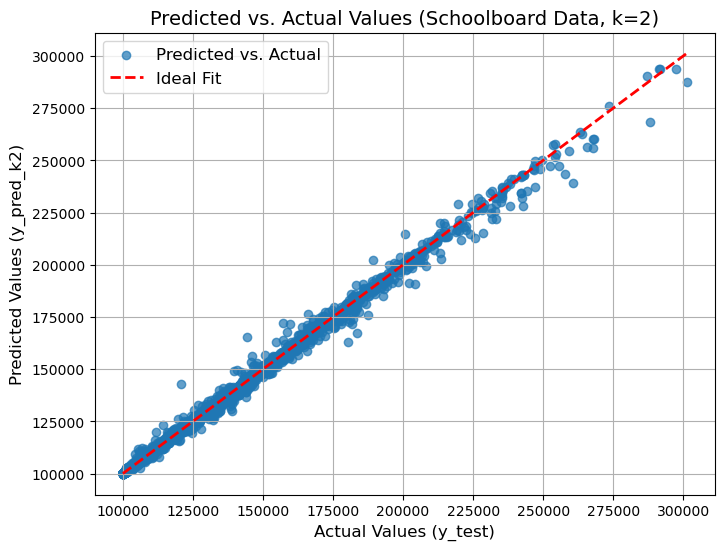

In [38]:
# Plot to compare predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_k2, alpha=0.7, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.title('Predicted vs. Actual Values (Schoolboard Data, k=2)', fontsize=14)
plt.xlabel('Actual Values (y_test)', fontsize=12)
plt.ylabel('Predicted Values (y_pred_k2)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [10]:
##Municipalities
# Load the uploaded dataset
data_mun = pd.read_csv("3new_municipalities_with_wages.csv")

# Display the first few rows of the dataset to understand its structure
data_mun.head()

,Sector,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year,Occurrences on List,GDP,Inflation,Total Compensation,Average wages in industry,Average wages in Canada
0,Municipalities and Services,106635.64,510.42,City of Barrie,high,2003,6,410389.953125,2.758563,107146.06,50086.4,37544.0
1,Municipalities and Services,107874.17,5113.37,City of Barrie,high,2003,7,410389.953125,2.758563,112987.54,50086.4,37544.0
2,Municipalities and Services,122631.37,5127.30,City of Barrie,high,2003,5,410389.953125,2.758563,127758.67,50086.4,37544.0
3,Municipalities and Services,122631.37,5127.30,City of Barrie,high,2003,4,410389.953125,2.758563,127758.67,50086.4,37544.0
4,Municipalities and Services,122443.29,482.21,City of Barrie,high,2003,8,410389.953125,2.758563,122925.50,50086.4,37544.0


In [14]:
# Select features and target variable
features = ['Salary Paid', 'Taxable Benefits', 'GDP', 'Inflation', 
            'Average wages in industry', 'Average wages in Canada']
target = 'Total Compensation'

# Drop rows with missing values
data_mun_cleaned = data_mun[features + [target]].dropna()

# Split into features (X) and target (y)
X_mun = data_mun_cleaned[features]
y_mun = data_mun_cleaned[target]

# Normalize the features
scaler = StandardScaler()
X_mun_scaled = scaler.fit_transform(X_mun)

# Split the data into training and testing sets
X_mun_train, X_mun_test, y_mun_train, y_mun_test = train_test_split(
    X_mun_scaled, y_mun, test_size=0.2, random_state=42)

# Find the best K using cross-validation
k_values = range(1, 21)
cv_scores_mun = [cross_val_score(KNeighborsRegressor(n_neighbors=k), X_mun_train, y_mun_train, 
                                 cv=5, scoring='neg_mean_squared_error').mean() for k in k_values]

# Identify the K with the best score (least negative mean squared error)
optimal_k_mun = k_values[np.argmax(cv_scores_mun)]

# Print optimal K
print(f"The optimal number of neighbors (k) for municipalities data is: {optimal_k_mun}")


The optimal number of neighbors (k) for municipalities data is: 3


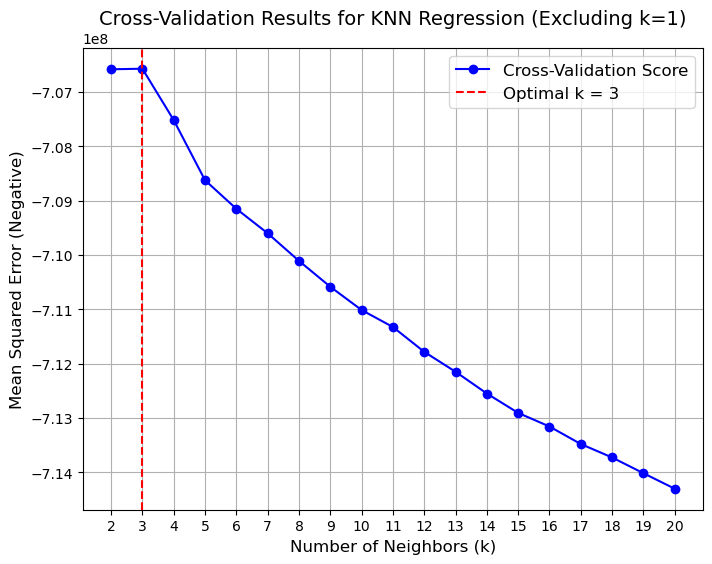

3

In [15]:
# Recompute cross-validation scores for K values
cv_scores_mun = [cross_val_score(KNeighborsRegressor(n_neighbors=k), X_mun_train, y_mun_train, 
                                 cv=5, scoring='neg_mean_squared_error').mean()
                 for k in k_values]

# Filter out k=1 and find the best k
filtered_k_values_mun = list(k for k in k_values if k != 1)
filtered_cv_scores_mun = [cv_scores_mun[k - 1] for k in filtered_k_values_mun]
best_k_excluding_1_mun = filtered_k_values_mun[np.argmax(filtered_cv_scores_mun)]

# Plot the graph for k values excluding k=1
plt.figure(figsize=(8, 6))
plt.plot(filtered_k_values_mun, filtered_cv_scores_mun, marker='o', linestyle='-', color='blue', 
         label='Cross-Validation Score')
plt.title('Cross-Validation Results for KNN Regression (Excluding k=1)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Mean Squared Error (Negative)', fontsize=12)
plt.xticks(filtered_k_values_mun)
plt.grid(True)
plt.axvline(x=best_k_excluding_1_mun, color='red', linestyle='--', label=f'Optimal k = {best_k_excluding_1_mun}')
plt.legend(fontsize=12)
plt.show()

best_k_excluding_1_mun


In [19]:

# Train the KNN model with k=3 (optimal k)
knn_model_mun_k3 = KNeighborsRegressor(n_neighbors=3)
knn_model_mun_k3.fit(X_mun_train, y_mun_train)

# Make predictions on the test set
y_mun_pred_k3 = knn_model_mun_k3.predict(X_mun_test)

# Evaluate the model
mse_mun_k3 = mean_squared_error(y_mun_test, y_mun_pred_k3)
r2_mun_k3 = r2_score(y_mun_test, y_mun_pred_k3)

# Display results
mse_mun_k3, r2_mun_k3


(889238.4413606909, 0.9979009058318427)

In [21]:

# Calculate additional metrics
mae_mun = mean_absolute_error(y_mun_test, y_mun_pred_k3)
rmse_mun = np.sqrt(mse_mun_k3)  # RMSE from MSE
mape_mun = np.mean(np.abs((y_mun_test - y_mun_pred_k3) / y_mun_test)) * 100  # MAPE
explained_var_mun = explained_variance_score(y_mun_test, y_mun_pred_k3)

# Display the metrics
mae_mun, rmse_mun, mape_mun, explained_var_mun


(172.41557533776765,
 942.9944015532069,
 0.11374046600394029,
 0.9979015751050379)

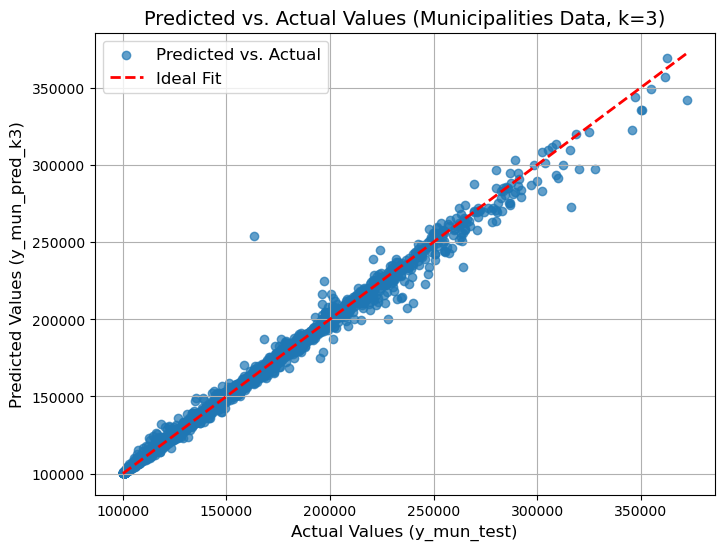

In [22]:
# Plot to compare predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_mun_test, y_mun_pred_k3, alpha=0.7, label='Predicted vs. Actual')
plt.plot([y_mun_test.min(), y_mun_test.max()], [y_mun_test.min(), y_mun_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.title('Predicted vs. Actual Values (Municipalities Data, k=3)', fontsize=14)
plt.xlabel('Actual Values (y_mun_test)', fontsize=12)
plt.ylabel('Predicted Values (y_mun_pred_k3)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



In [ ]:
##Hospital
# Load the uploaded dataset
data_hos = pd.read_csv("3new_hospital_with_wages.csv")

# Display the first few rows of the dataset to understand its structure
data_hos.head()


,Sector,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year,Occurrences on List,GDP,Inflation,Total Compensation,Average wages in industry,Average wages in Canada
0,Hospitals and Boards of Public Health,178536.40,9407.44,Algoma Health Unit,high,2003,1,410389.953125,2.758563,187943.84,39540.8,37544.0
1,Hospitals and Boards of Public Health,101102.00,0.00,Almonte General Hospital,other,2003,1,410389.953125,2.758563,101102.00,39540.8,37544.0
2,Hospitals and Boards of Public Health,145957.00,0.00,Almonte General Hospital,high,2003,4,410389.953125,2.758563,145957.00,39540.8,37544.0
3,Hospitals and Boards of Public Health,141155.75,892.20,Arnprior & District Memorial Hospital,high,2003,1,410389.953125,2.758563,142047.95,39540.8,37544.0
4,Hospitals and Boards of Public Health,110504.41,554.04,Arnprior & District Memorial Hospital,high,2003,6,410389.953125,2.758563,111058.45,39540.8,37544.0


In [24]:
# Select features and target variable
features = ['Salary Paid', 'Taxable Benefits', 'GDP', 'Inflation', 
            'Average wages in industry', 'Average wages in Canada']
target = 'Total Compensation'

# Drop rows with missing values
data_hos_cleaned = data_hos[features + [target]].dropna()

# Split into features (X) and target (y)
X_hos = data_hos_cleaned[features]
y_hos = data_hos_cleaned[target]

# Normalize the features
scaler = StandardScaler()
X_hos_scaled = scaler.fit_transform(X_hos)

# Split the data into training and testing sets
X_hos_train, X_hos_test, y_hos_train, y_hos_test = train_test_split(
    X_hos_scaled, y_hos, test_size=0.2, random_state=42)

# Find the best K using cross-validation
k_values = range(1, 21)
cv_scores_hos = [
    cross_val_score(KNeighborsRegressor(n_neighbors=k), X_hos_train, y_hos_train, 
                    cv=5, scoring='neg_mean_squared_error').mean()
    for k in k_values
]

# Identify the K with the best score (least negative mean squared error)
optimal_k_hos = k_values[np.argmax(cv_scores_hos)]

optimal_k_hos


1

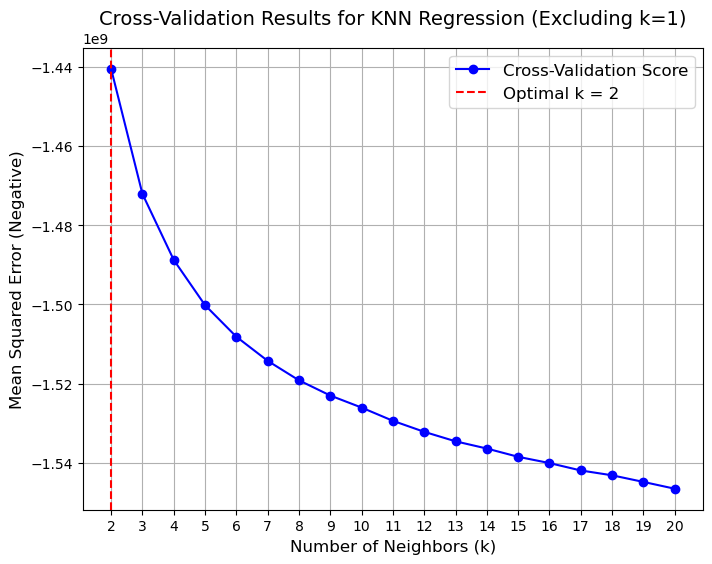

2

In [25]:
# Recompute cross-validation scores for K values
cv_scores_hos = [
    cross_val_score(KNeighborsRegressor(n_neighbors=k), X_hos_train, y_hos_train, 
                    cv=5, scoring='neg_mean_squared_error').mean()
    for k in k_values
]

# Filter out k=1 and find the best k
filtered_k_values_hos = list(k for k in k_values if k != 1)
filtered_cv_scores_hos = [cv_scores_hos[k - 1] for k in filtered_k_values_hos]
best_k_excluding_1_hos = filtered_k_values_hos[np.argmax(filtered_cv_scores_hos)]

# Plot the graph for k values excluding k=1
plt.figure(figsize=(8, 6))
plt.plot(filtered_k_values_hos, filtered_cv_scores_hos, marker='o', linestyle='-', color='blue', 
         label='Cross-Validation Score')
plt.title('Cross-Validation Results for KNN Regression (Excluding k=1)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Mean Squared Error (Negative)', fontsize=12)
plt.xticks(filtered_k_values_hos)
plt.grid(True)
plt.axvline(x=best_k_excluding_1_hos, color='red', linestyle='--', label=f'Optimal k = {best_k_excluding_1_hos}')
plt.legend(fontsize=12)
plt.show()

best_k_excluding_1_hos


In [26]:
# Train the KNN model with k=2 (optimal k)
knn_model_hos_k2 = KNeighborsRegressor(n_neighbors=2)
knn_model_hos_k2.fit(X_hos_train, y_hos_train)

# Make predictions on the test set
y_hos_pred_k2 = knn_model_hos_k2.predict(X_hos_test)

# Evaluate the model
mse_hos_k2 = mean_squared_error(y_hos_test, y_hos_pred_k2)
r2_hos_k2 = r2_score(y_hos_test, y_hos_pred_k2)

# Display results
mse_hos_k2, r2_hos_k2


(16179633.21622401, 0.9958453359532461)

In [27]:
# Calculate additional metrics
mae_hos = mean_absolute_error(y_hos_test, y_hos_pred_k2)
rmse_hos = np.sqrt(mse_hos_k2)  # RMSE from MSE
mape_hos = np.mean(np.abs((y_hos_test - y_hos_pred_k2) / y_hos_test)) * 100  # MAPE
explained_var_hos = explained_variance_score(y_hos_test, y_hos_pred_k2)

# Display the metrics
mae_hos, rmse_hos, mape_hos, explained_var_hos


(592.9782037397412, 4022.391479732425, 0.25798674608625677, 0.9958467589797259)

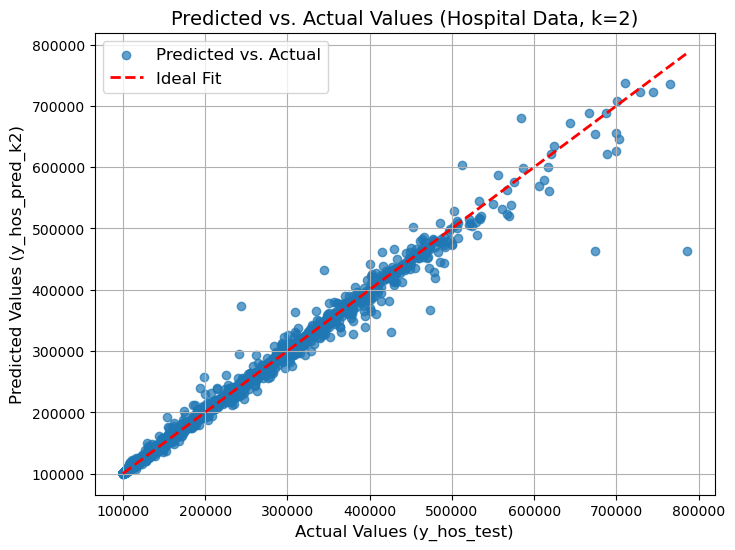

In [28]:
# Plot to compare predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_hos_test, y_hos_pred_k2, alpha=0.7, label='Predicted vs. Actual')
plt.plot([y_hos_test.min(), y_hos_test.max()], [y_hos_test.min(), y_hos_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.title('Predicted vs. Actual Values (Hospital Data, k=2)', fontsize=14)
plt.xlabel('Actual Values (y_hos_test)', fontsize=12)
plt.ylabel('Predicted Values (y_hos_pred_k2)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

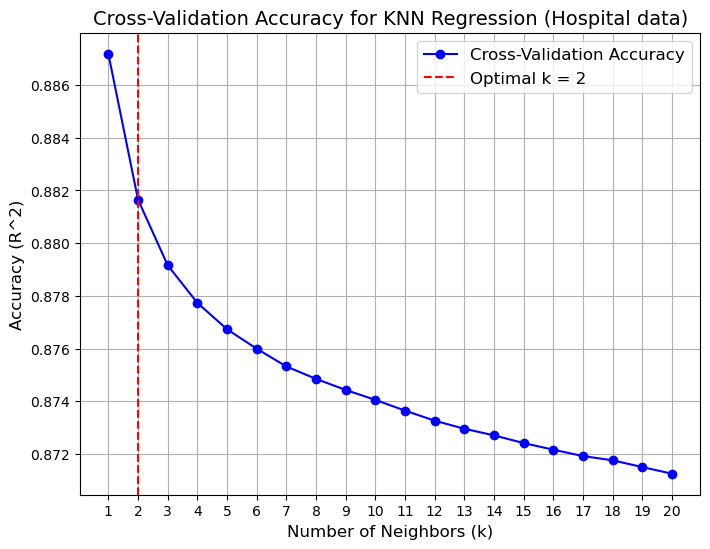

In [ ]:
##Hospital accuracy plot
# Recompute cross-validation scores for accuracy (R^2)
accuracy_scores_hos = [
    cross_val_score(KNeighborsRegressor(n_neighbors=k), X_hos_train, y_hos_train, 
                    cv=5, scoring='r2').mean()
    for k in k_values
]

# Plot the graph for k values with accuracy
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores_hos, marker='o', linestyle='-', color='blue', label='Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for KNN Regression (Hospital data)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy (R^2)', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.axvline(x=2, color='red', linestyle='--', label='Optimal k = 2')
plt.legend(fontsize=12)
plt.show()


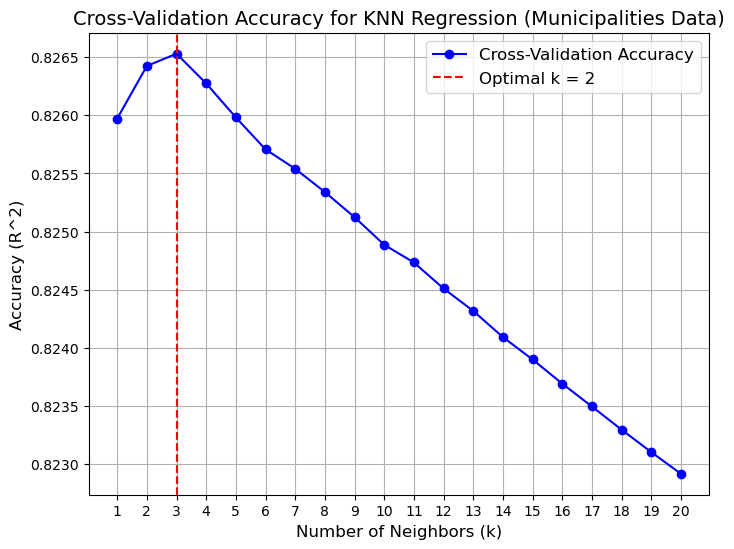

In [ ]:
##Municipalities accuracy plot
# Recompute cross-validation scores for accuracy (R^2) for the municipalities dataset
accuracy_scores_mun = [
    cross_val_score(KNeighborsRegressor(n_neighbors=k), X_mun_train, y_mun_train, 
                    cv=5, scoring='r2').mean()
    for k in k_values
]

# Plot the graph for k values with accuracy
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores_mun, marker='o', linestyle='-', color='blue', label='Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for KNN Regression (Municipalities Data)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy (R^2)', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.axvline(x=3, color='red', linestyle='--', label='Optimal k = 2')
plt.legend(fontsize=12)
plt.show()


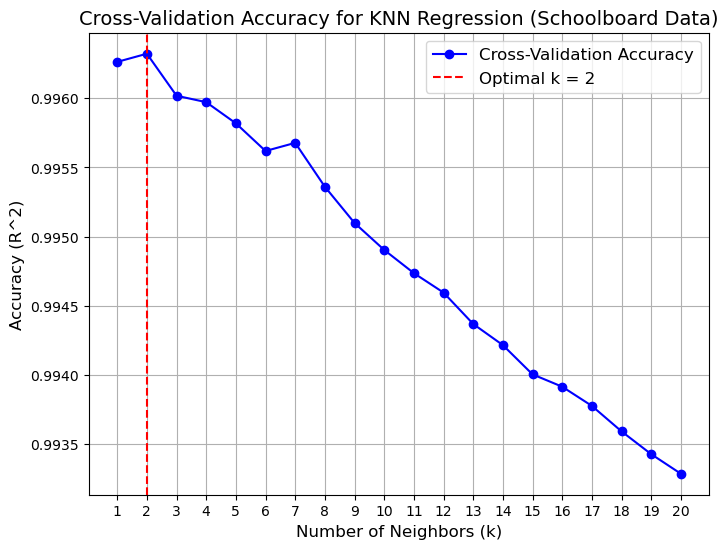

In [ ]:
## Schoolboard accuracy plot
# Recompute cross-validation scores for accuracy (R^2) for the school dataset
accuracy_scores = [
    cross_val_score(KNeighborsRegressor(n_neighbors=k), X_train, y_train, 
                    cv=5, scoring='r2').mean()
    for k in k_values
]

# Plot the graph for k values with accuracy
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='blue', label='Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for KNN Regression (Schoolboard Data)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy (R^2)', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.axvline(x=2, color='red', linestyle='--', label='Optimal k = 2')
plt.legend(fontsize=12)
plt.show()
